# Otoliths predictions

In [1]:
%matplotlib inline 
from util.useful_imports import *

## Exploratory analysis

** Load images from the root folder... **

In [2]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225])
valid_trans = transforms.Compose([       
        transforms.Lambda(lambda x: ut.make_square(x)),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        normalize
])
dset_valid = ImageFolder(root='data/valid/', transform=valid_trans)
valid = transforms.Compose([        
        transforms.Lambda(lambda x: ut.make_square(x)),
        transforms.Resize((224, 224))
])
dsetreal = ImageFolder(root='data/valid/', transform=valid)


data = ImageFolder(root=TRAIN_DIR,
                   transform=
                       transforms.Compose([
                           transforms.ColorJitter(brightness=0.2, contrast=0.2,saturation=0.2),
                           transforms.RandomHorizontalFlip(),
                           transforms.RandomRotation(15,resample=PIL.Image.BILINEAR, expand=True),
                           transforms.Lambda(lambda x: ut.make_square(x)),                           
                           transforms.Resize((224, 224))]))

In [3]:
loader = ImageFolder(root=TRAIN_DIR)
label_map = dict({loader.class_to_idx[name]: name for name in loader.classes})

There are 1342 images with 51 different labels:

Alver (1)
Ansjovis (9)
Baars (8)
Bittervoorn (2)
Blankvoorn (22)
Bot (30)
Braam (2)
Brakwatergrondel (42)
Brasem (6)
Dikkop (33)
Driedoornige stekelbaars (51)
Dunlipharder (2)
Dwergbolk (6)
Dwergtong (11)
Engelse poon (2)
Fint (28)
Gevlekte pitvis (6)
Gewone pitvis (35)
Gewone slakdolf (32)
Gewone tong (14)
Gewone zeedonderpad (5)
Glasgrondel (41)
Griet (2)
Haring (78)
Harnasmannetje (32)
Kabeljauw (10)
Kleine Pieterman (12)
Kleine zandspiering (214)
Kolblei (4)
Koornaarvis (4)
Lozano_s grondel (39)
Mul (8)
Pos (12)
Rasterpitvis (12)
Rode poon (19)
Sardien (13)
Schar (20)
Schelvis (4)
Schol (20)
Schurftvis (9)
Smelt (45)
Snoekbaars (13)
Snotolf (2)
Spiering (97)
Sprot (97)
Steenbolk (58)
Tiendoornige stekelbaars (19)
Tongschar (6)
Vijfdradige Meun (17)
Wijting (36)
Zeebaars (52)


[Text(0,0,'Alver'),
 Text(0,0,'Ansjovis'),
 Text(0,0,'Baars'),
 Text(0,0,'Bittervoorn'),
 Text(0,0,'Blankvoorn'),
 Text(0,0,'Bot'),
 Text(0,0,'Braam'),
 Text(0,0,'Brakwatergrondel'),
 Text(0,0,'Brasem'),
 Text(0,0,'Dikkop'),
 Text(0,0,'Driedoornige stekelbaars'),
 Text(0,0,'Dunlipharder'),
 Text(0,0,'Dwergbolk'),
 Text(0,0,'Dwergtong'),
 Text(0,0,'Engelse poon'),
 Text(0,0,'Fint'),
 Text(0,0,'Gevlekte pitvis'),
 Text(0,0,'Gewone pitvis'),
 Text(0,0,'Gewone slakdolf'),
 Text(0,0,'Gewone tong'),
 Text(0,0,'Gewone zeedonderpad'),
 Text(0,0,'Glasgrondel'),
 Text(0,0,'Griet'),
 Text(0,0,'Haring'),
 Text(0,0,'Harnasmannetje'),
 Text(0,0,'Kabeljauw'),
 Text(0,0,'Kleine Pieterman'),
 Text(0,0,'Kleine zandspiering'),
 Text(0,0,'Kolblei'),
 Text(0,0,'Koornaarvis'),
 Text(0,0,'Lozano_s grondel'),
 Text(0,0,'Mul'),
 Text(0,0,'Pos'),
 Text(0,0,'Rasterpitvis'),
 Text(0,0,'Rode poon'),
 Text(0,0,'Sardien'),
 Text(0,0,'Schar'),
 Text(0,0,'Schelvis'),
 Text(0,0,'Schol'),
 Text(0,0,'Schurftvis'),
 Text(

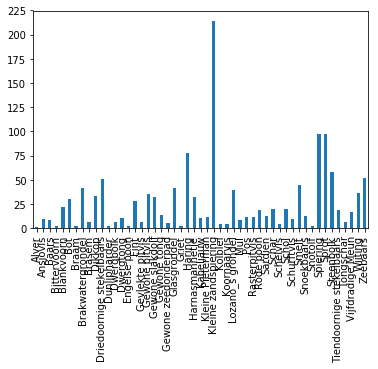

In [4]:
# print statitics
print('There are {} images with {} different labels:\n'.format(len(loader), len(loader.classes)))
frequencies = []
for label in loader.classes:
    idx = loader.class_to_idx[label]
    cant = sum([1 for (_, it) in loader if it == idx])
    frequencies.append(cant)
    print('{} ({})'.format(label, cant))   

freq_series = pd.Series.from_array(frequencies)
ax = freq_series.plot(kind='bar')
ax.set_xticklabels(loader.classes)    

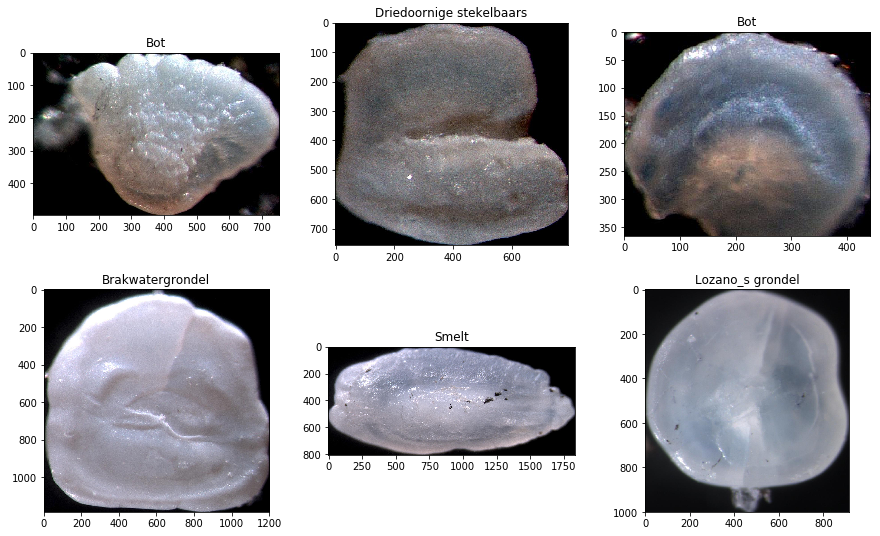

In [5]:
nrows, ncols = 2, 3
f, axs = plt.subplots(nrows, ncols, figsize=(15,9))

next_id = 0
for i in range(nrows):
    for j in range(ncols):
        idx = random.randint(0,len(loader)-1)
        axs[i,j].imshow(loader[idx][0])
        axs[i,j].set_title(label_map[loader[idx][1]])
        next_id = next_id + 1

# Data processing

##  1. Partitioning data into training and test
### 1.1. Segment the training

In [ ]:
from skimage.io import imread, imsave

if os.path.exists(REF_SEG_DIR):
    shutil.rmtree(REF_SEG_DIR)
    
os.makedirs(REF_SEG_DIR)

threshold = 0.25
remove_bg = False
conv_sigma = 2.0
opening_size = 30

for label in os.listdir(ROOT_DIR):
    
    cur_dir = os.path.join(ROOT_DIR, label)
    tar_dir = os.path.join(REF_SEG_DIR, label)
    
    if not os.path.exists(tar_dir):
        os.makedirs(tar_dir)
    
    img_list = glob.glob(cur_dir + '/*.jpg')
    
    print(label)
    
    for image_path in img_list:
        
        image = imread(image_path)
        images_names = os.path.basename(image_path)
        images_names = images_names[0:-4] + '_{}.jpg'
        regions = ut.segment_image(image, remove_bg, threshold, conv_sigma,
                        opening_size)
        for i, reg in enumerate(regions):
            
            if len(images_names):
                min_row, min_col, max_row, max_col = reg.bbox
                segm_im = image[min_row:max_row][:,min_col:max_col]                             
                
                if segm_im.size / 8192 < 20.0: #this are noise
                    continue                    
                if segm_im.shape[0] == 1536 and segm_im.shape[1] == 2048: # cannot segment
                    continue 
                imsave(os.path.join(tar_dir, images_names.format(i+1)), segm_im)

Partition the data to train and valid

In [5]:
# create train and valid directories
if os.path.exists(TRAIN_DIR):
    shutil.rmtree(TRAIN_DIR)

os.makedirs(TRAIN_DIR)
    
if os.path.exists(VALID_DIR):
    shutil.rmtree(VALID_DIR)
    
os.makedirs(VALID_DIR)

train_per = 0.9

# making a partition of training and valid sets
for dire in os.listdir(REF_SEG_DIR):
    
    #create path for train
    p1 = os.path.join(TRAIN_DIR, dire)
    if not os.path.exists(p1):
        os.makedirs(p1)
        
    #create path for valid
    p2 = os.path.join(VALID_DIR, dire)
    if not os.path.exists(p2):
        os.makedirs(p2)
    
    img_list = glob.glob(os.path.join(REF_SEG_DIR, dire) + '/*.jpg')
    n = len(img_list)
    rp = np.random.permutation(n)

    # number of training images
    train = math.floor(train_per * n)
    
    for i in range(n):
        j = rp[i]
        
        filepath = img_list[j]
        filename = os.path.basename(filepath)
        
        if i < train or n <= 5:
            copyfile(filepath, p1 + '/' + filename)
        
        if i >= train or n <= 5:
            copyfile(filepath, p2 + '/' + filename)

## 2. Create test data

Prepare a list of test images, containing all paths

In [3]:
img_list = []

for dire in os.listdir(SAMPLE_DIR):
    my_dir = os.path.join(SAMPLE_DIR, dire)
    for subdir in os.listdir(my_dir):        
        cur_dir = os.path.join(my_dir,subdir)
        if not os.path.isdir(cur_dir):
            continue
        #print(cur_dir)        
        jpg_list = glob.glob(cur_dir + '/*.jpg')
        tif_list = glob.glob(cur_dir + '/*.tif')
        
        img_list.extend(jpg_list)
        
        for tif_file in tif_list:
            name = os.path.basename(tif_file)
            name = name[0:-4]
            # check if format .jpg does not exist in the list
            if name + '.jpg' not in jpg_list:
                img_list.append(tif_file)

Segment all images

In [ ]:
from skimage.io import imread, imsave

if os.path.exists(TEST_DIR):
    shutil.rmtree(TEST_DIR)
    
os.makedirs(TEST_DIR)

threshold = 0.25
remove_bg = False
conv_sigma = 2.0
opening_size = 30

for image_path in img_list:

    image = imread(image_path)    
    images_names = os.path.basename(image_path)
    images_names = images_names[0:-4] + '_{}.jpg'

    regions = ut.segment_image(image, remove_bg, threshold, conv_sigma,
                        opening_size)

    for i, reg in enumerate(regions):
        if len(images_names):
            min_row, min_col, max_row, max_col = reg.bbox
            segm_im = image[min_row:max_row][:,min_col:max_col]            
            imsave(os.path.join(TEST_DIR, images_names.format(i+1)), segm_im)

## 3. Data augmentation
* Segment image
* Random Rotation (-15,+15)
* Random Horizontal Flip
* Random brightness (0.2)
* Random contrast (0.2)
* Random saturation (0.2)
* Resize to 224 x 224

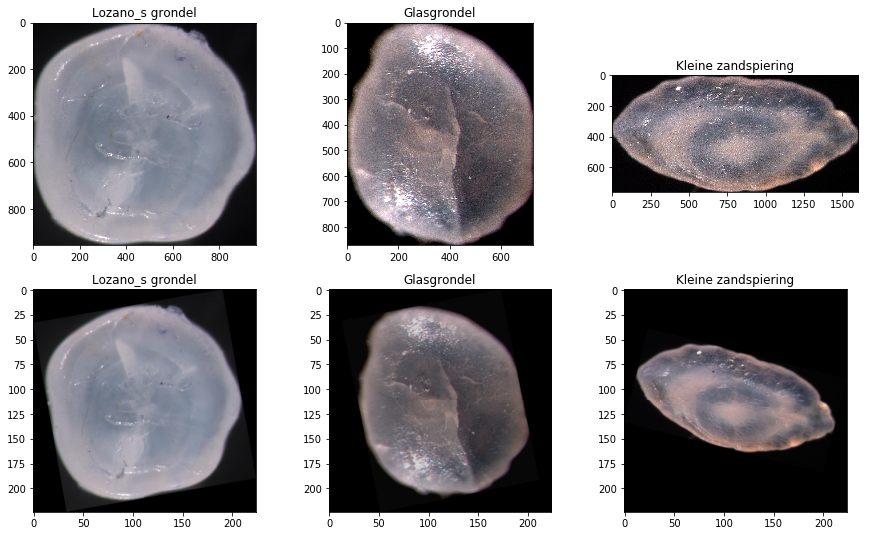

In [7]:
nrows, ncols = 2, 3
f, axs = plt.subplots(nrows, ncols, figsize=(15,9))

for j in range(ncols):
    idx = random.randint(0,len(loader)-1)
    axs[0,j].imshow(loader[idx][0])
    axs[0,j].set_title(label_map[loader[idx][1]])
    axs[1,j].imshow(data[idx][0])
    axs[1,j].set_title(label_map[data[idx][1]])

# Test performance

** Residual Networks for Image Recognition (reset18)**

** Train model **
* Loss function
$$\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$
* Stochastic Gradient Descent with Momentum 0.9, weight decay 0.0001
* 55 epochs
* batch size 32
* valid error = 0.9497

** Load model **

In [4]:
model_name = 'resnet18'
checkpoint = torch.load('output/best_{}.pth.tar'.format(model_name), map_location=lambda storage, loc: storage)
model = models.resnet18()
model = CNNs.FineTuneModel(model, 'resnet18', len(loader.classes))
model.load_state_dict(checkpoint['state_dict'])

def predict_label(output):
    """ Compute the accuracy """
    _, pred = torch.max(output, dim=1)
    return label_map[pred.cpu().numpy().tolist()[0]]

### Predictions on the validation data

100%|██████████| 199/199 [00:37<00:00,  6.42it/s]


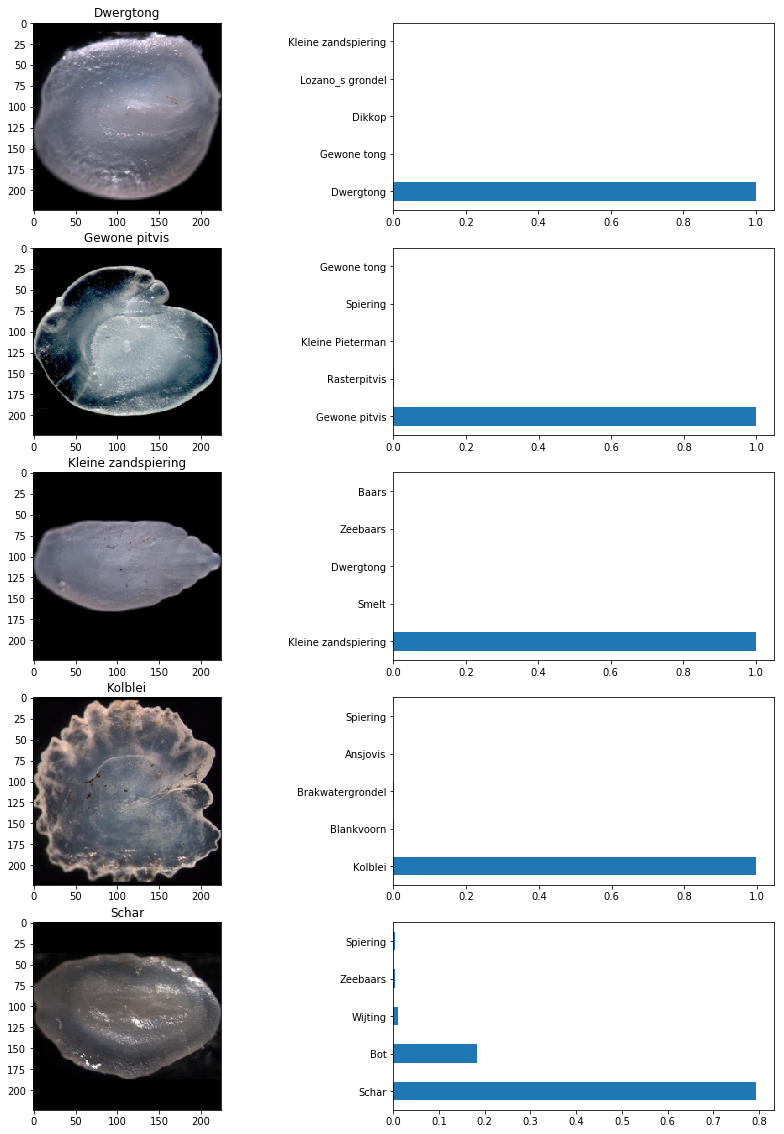

In [6]:
kth = 5 # number of output
nrows, ncols = 5, 2
f, axs = plt.subplots(nrows, ncols, figsize=(15,20))

model.eval()
cnt = 0
sigmoid = nn.Softmax(dim=1)
names = np.array([label_map[i] for i in label_map.keys()])

true_labels = []
pred_labels = []

order = np.random.permutation(len(dset_valid))

for i in tqdm(range(len(dset_valid))):
    idx = order[i]
    img = dset_valid[idx][0]
    img = Variable(img[None, :])
    
    output = model(img)
    pred =  predict_label(output.data)       

    pro = sigmoid(output).data.cpu().numpy()
    ind = pro[0,:].argsort()[::-1][0:kth]    
    freq_series = pd.Series.from_array(pro[0,:][ind])
    
    # adding labels
    true_labels.append(label_map[dset_valid[idx][1]])
    pred_labels.append(names[ind[0]])
    
    if (cnt == nrows):
        continue
        
    axs[cnt,0].imshow(dsetreal[idx][0])
    axs[cnt,0].set_title(label_map[dset_valid[idx][1]])
    
    
    axs[cnt,1] = freq_series.plot(kind='barh', ax=axs[cnt,1])
    axs[cnt,1].set_yticklabels(names[ind])
    
    cnt = cnt + 1

Let's see the confussion matrix

In [7]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 2 0 0]
 [0 0 0 ..., 0 6 0]
 [0 0 0 ..., 0 0 7]]


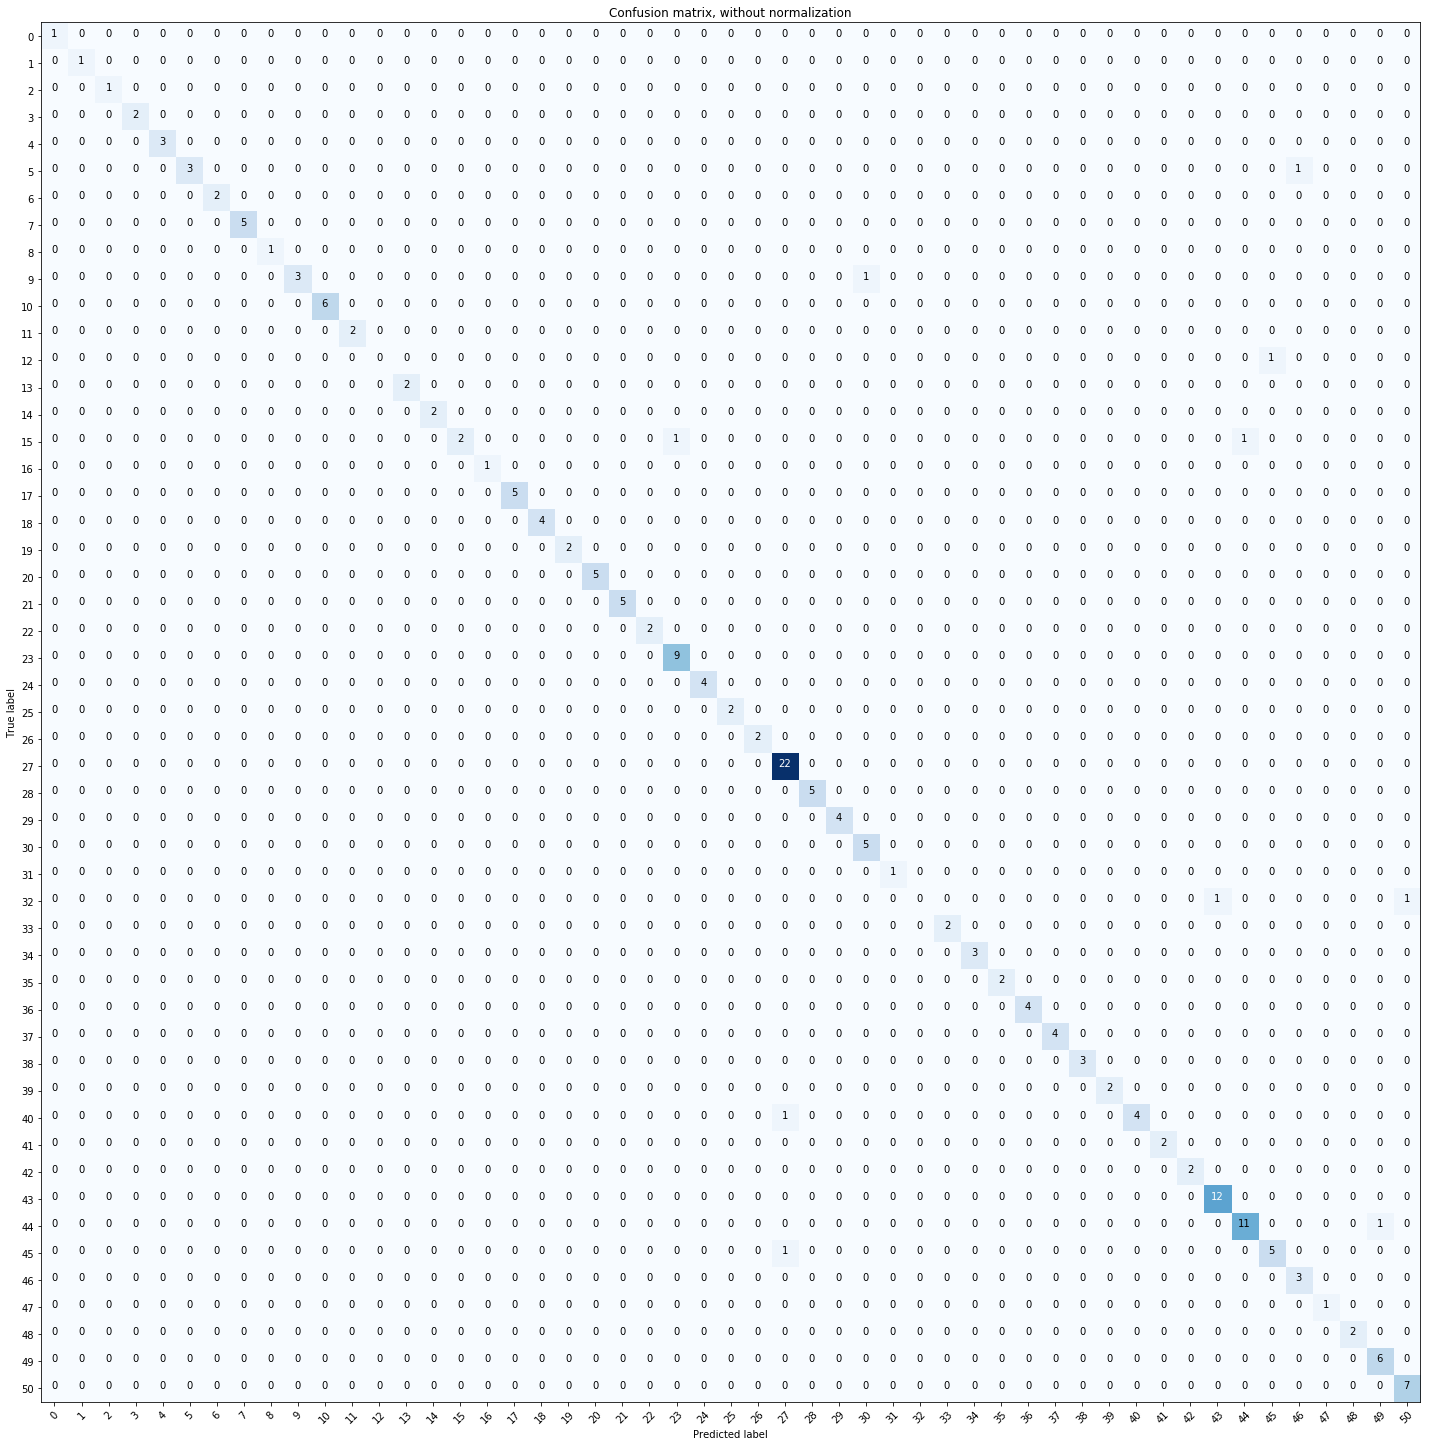

In [8]:
conf_mat = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(20,20))
plot_confusion_matrix(conf_mat, classes=range(51),
                      title='Confusion matrix, without normalization')

### Predictions on the test data

In [9]:
labels = data.classes  # all lables
num_classes = len(labels)    # number of classes
label_map = dict({data.class_to_idx[name]: name for name in data.classes})

dset_test = pu.DataLoader(None, TEST_DIR, valid_trans, labels)

Some test images

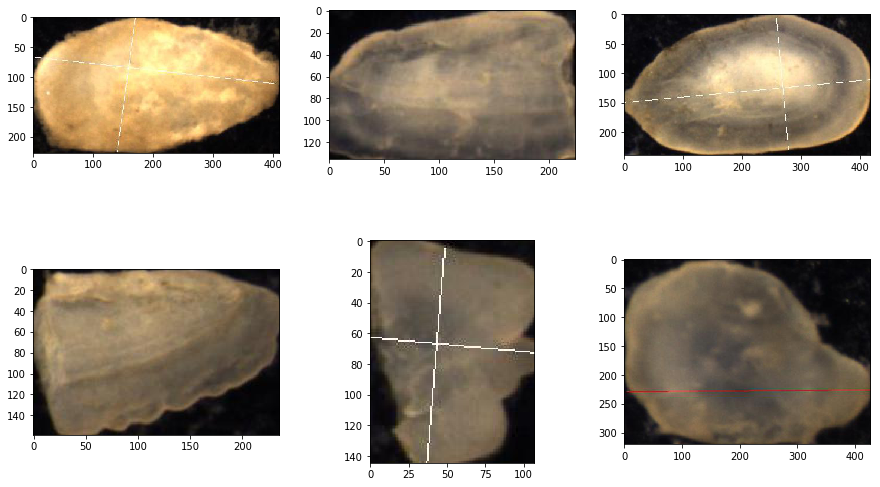

In [10]:
nrows, ncols = 2, 3
f, axs = plt.subplots(nrows, ncols, figsize=(15,9))

img_list = os.listdir(TEST_DIR)
axs = axs.flatten()
for j in range(ncols * nrows):
    idx = random.randint(0,len(dset_test)-1)
    img = PIL.Image.open(os.path.join(TEST_DIR, img_list[idx]))
    axs[j].imshow(img)

In [11]:
def getNameAndNumber(s):
    t = s.rfind('_')
    return (s[0:t], int(s[t+1:].split('.')[0]))

In [17]:
kth = 3 # number of output

model.eval()
cnt = 0
sigmoid = nn.Softmax(dim=1)
names = np.array([label_map[i] for i in label_map.keys()])

pred_labels = []
pred_probs = []
img_names = []
img_nums = []

for idx in tqdm(range(len(dset_test))):    
    img = dset_test[idx]['image']
    img = Variable(img[None, :])
    name, num = getNameAndNumber(dset_test[idx]['name'])
    
    output = model(img)
    pred =  predict_label(output.data)       

    pro = sigmoid(output).data.cpu().numpy()
    ind = pro[0,:].argsort()[::-1][0:kth]    
    freq_series = pd.Series.from_array(pro[0,:][ind])
    
    # adding labels
    pred_labels.append(names[ind])
    pred_probs.append(pro[0,:][ind])
    img_names.append('F_' + '_ad_'.join(name.split('_AD_')))
    img_nums.append(num)

100%|██████████| 35/35 [00:04<00:00,  8.37it/s]


Reformat labels and their probabilities

In [18]:
pred_labels = np.vstack(pred_labels)
pred_probs = np.vstack(pred_probs)

Create a data frame

In [19]:
df = pd.DataFrame()
df['Picture ID'] = img_names
df['Nr on picture'] = img_nums
for i in range(kth):
    df['ID {}'.format(i+1)] = pred_labels[:,i]
    df['Pro {}'.format(i+1)] = pred_probs[:,i]
df = df.sort_values(['Picture ID', 'Nr on picture'])
df.to_csv('output/predict.csv', index=False, encoding='utf-16', float_format='%.4f')

In [20]:
df.head()

,Picture ID,Nr on picture,ID 1,Pro 1,ID 2,Pro 2,ID 3,Pro 3
2,F_GS_ad_SH_050517_SCH_+500µm_005,1,Wijting,0.430896,Zeebaars,0.229469,Tongschar,0.189814
30,F_GS_ad_SH_050517_SCH_+500µm_005,2,Gewone slakdolf,0.464996,Gevlekte pitvis,0.328874,Kleine zandspiering,0.142098
16,F_GS_ad_SH_050517_SCH_+500µm_005,3,Kleine zandspiering,0.744235,Gevlekte pitvis,0.128048,Wijting,0.069049
13,F_GS_ad_SH_050517_SCH_+500µm_005,4,Gevlekte pitvis,0.922127,Gewone slakdolf,0.054363,Kleine zandspiering,0.015463
14,F_GS_ad_SH_050517_SCH_+500µm_005,5,Gewone slakdolf,0.667440,Gevlekte pitvis,0.149074,Wijting,0.128480
